In [41]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [42]:
# Reading whale returns
whale_returns = Path("../Portfolio_analysis/whale_returns.csv")
whale_df = pd.read_csv(whale_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df.sort_index(inplace=True)

In [43]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [44]:
# Drop nulls
whale_df = whale_df.dropna().copy()

## Algorithmic Daily Returns
Read the algorithmic daily returns and clean the data

In [45]:
# Reading algorithmic returns
algo_returns = Path("../Portfolio_analysis/algo_returns.csv")
algo_df = pd.read_csv(algo_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df.sort_index(inplace=True)

In [46]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [47]:
# Drop nulls
algo_df = algo_df.dropna().copy()

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [48]:
# Reading S&P 500 Closing Prices
sp500_history = Path("../Portfolio_analysis/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history_df.sort_index(inplace=True)

In [49]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [50]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")
sp500_history_df["Close"]

<ipython-input-50-a3cc1ecd8dcb>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$", "")


Date
2012-10-01    1444.49
2012-10-02    1445.75
2012-10-03    1450.99
2012-10-04    1461.40
2012-10-05    1460.93
               ...   
2019-04-16    2907.06
2019-04-17    2900.45
2019-04-18    2905.03
2019-04-22    2907.97
2019-04-23    2933.68
Name: Close, Length: 1649, dtype: object

In [51]:
sp500_history_df["Close"] = sp500_history_df["Close"].astype("float")

In [52]:
# Calculate Daily Returns
sp500_df = sp500_history_df.pct_change()

In [53]:
# Drop nulls
sp500_df = sp500_df.dropna().copy()

In [54]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns={"Close": "SP500"})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [55]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_returns = pd.concat([whale_df, algo_df, sp500_df], axis='columns', join='inner')
portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

## Performance Analysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Portfolio daily returns'}, xlabel='Date'>

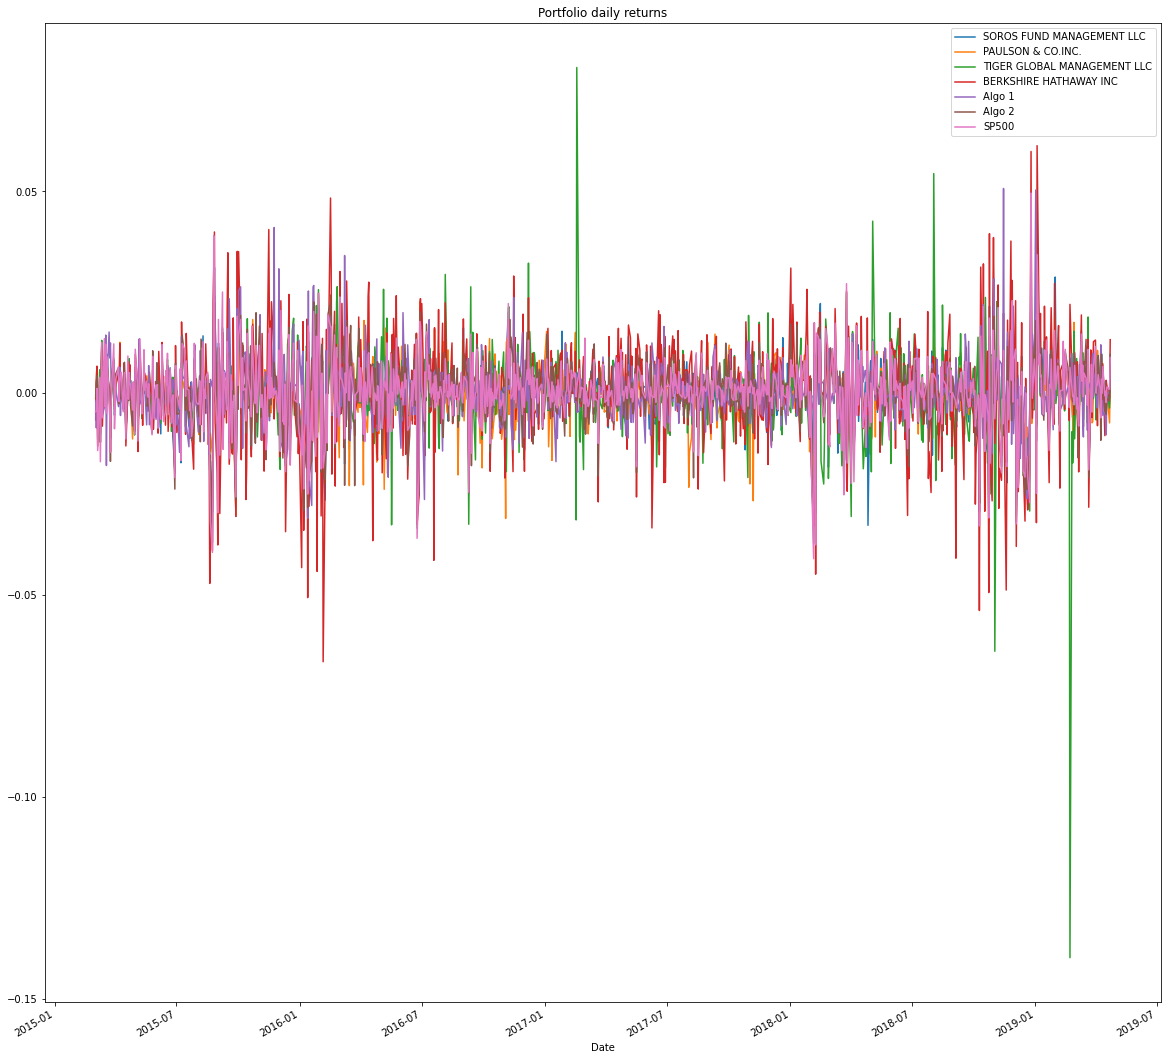

In [56]:
# Plot daily returns of all portfolios
portfolio_returns.plot(figsize=(20,20), title = "Portfolio daily returns")

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio cumulative returns'}, xlabel='Date'>

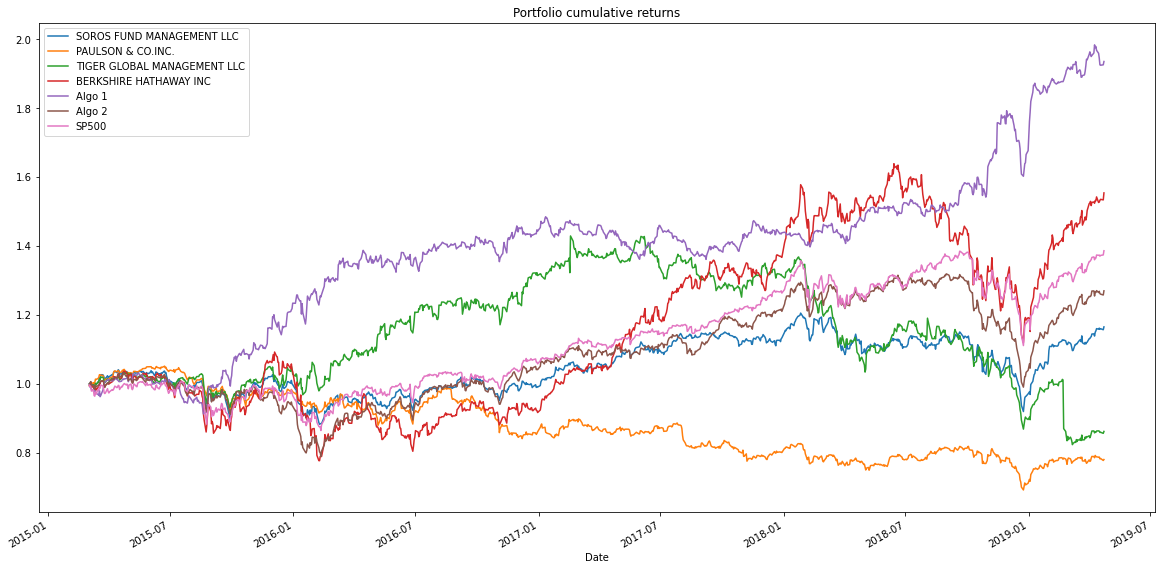

In [146]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_returns).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10), title="Portfolio cumulative returns")

In [ ]:
In cumulative returns, only the Algo 1 and Berkshire Hathaway outperfom the S&P500.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Risk'}>

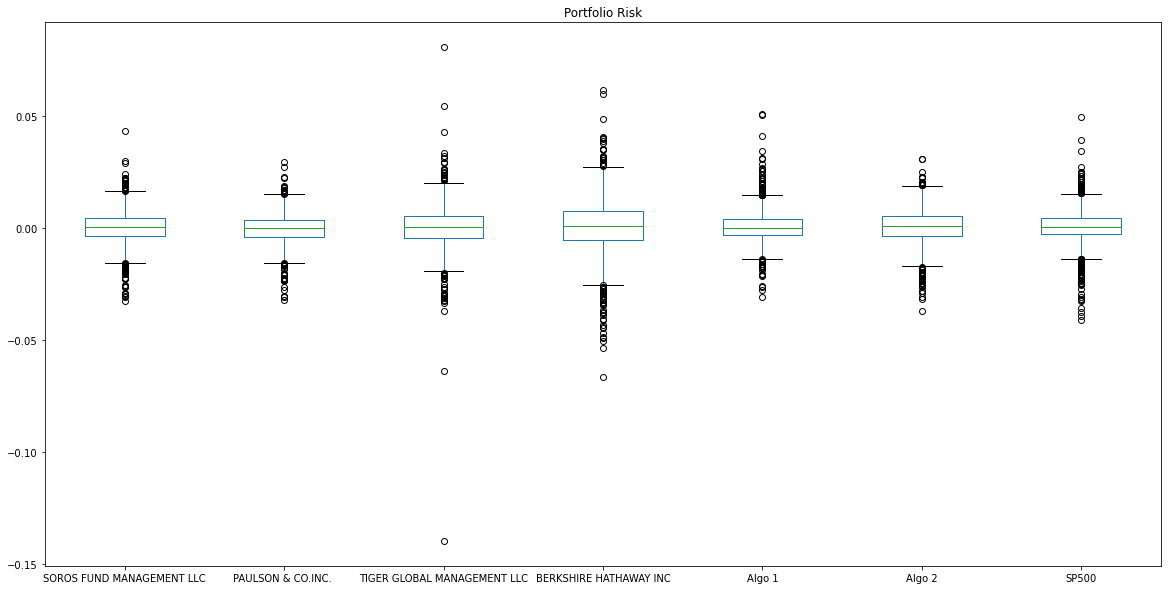

In [59]:
# Box plot to visually show risk
portfolio_returns.plot.box(figsize=(20,10), title = "Portfolio Risk")

### Calculate Standard Deviations

In [60]:
# Calculate the daily standard deviations of all portfolios
daily_std = portfolio_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500                          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [61]:
# Determine which portfolios are riskier than the S&P 500
daily_std = daily_std.sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
SP500                          0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

### Calculate the Annualized Standard Deviation

In [62]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
SP500                          0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analysis of the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [63]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_returns.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470


<AxesSubplot:title={'center':'Standard deviation'}, xlabel='Date'>

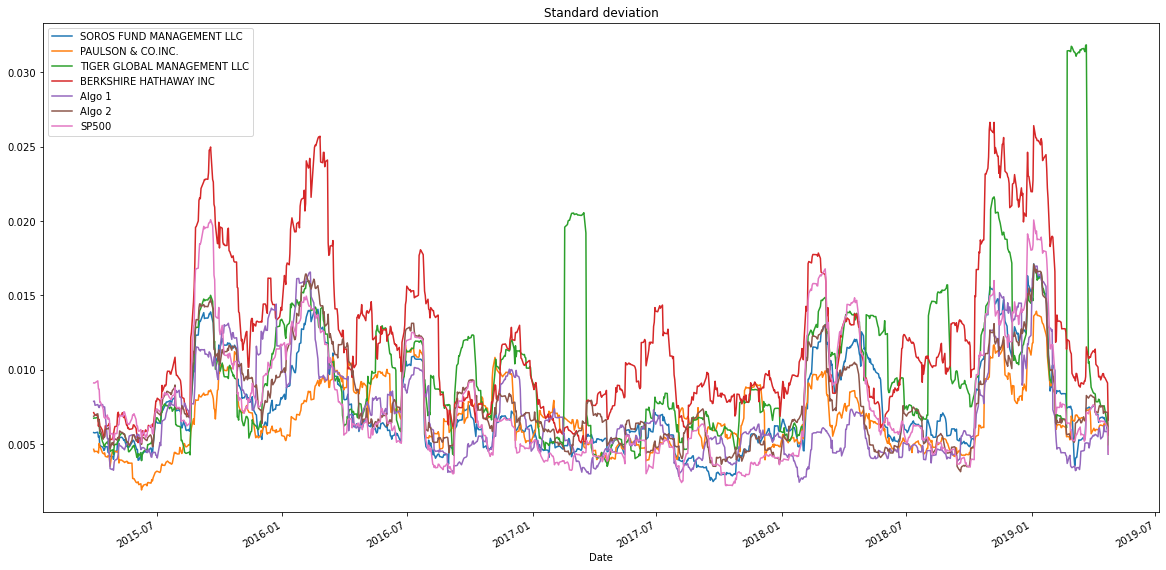

In [64]:
# Plot the rolling standard deviation
portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title = "Standard deviation")

### Calculate and plot the correlation

In [65]:
# Calculate the correlation
correlation = portfolio_returns.corr()

In [66]:
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [67]:
# Calculate covariance of a single portfolio
algo1_covariance = portfolio_returns['Algo 1'].cov(portfolio_returns['SP500'])
algo1_covariance

1.8217749991632744e-05

In [68]:
# Calculate variance of S&P 500
variance = portfolio_returns['SP500'].var()
variance

7.316632424648712e-05

In [69]:
# Computing beta
algo1_beta = algo1_covariance / variance
algo1_beta

0.24899091459425637

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1'}, xlabel='Date'>

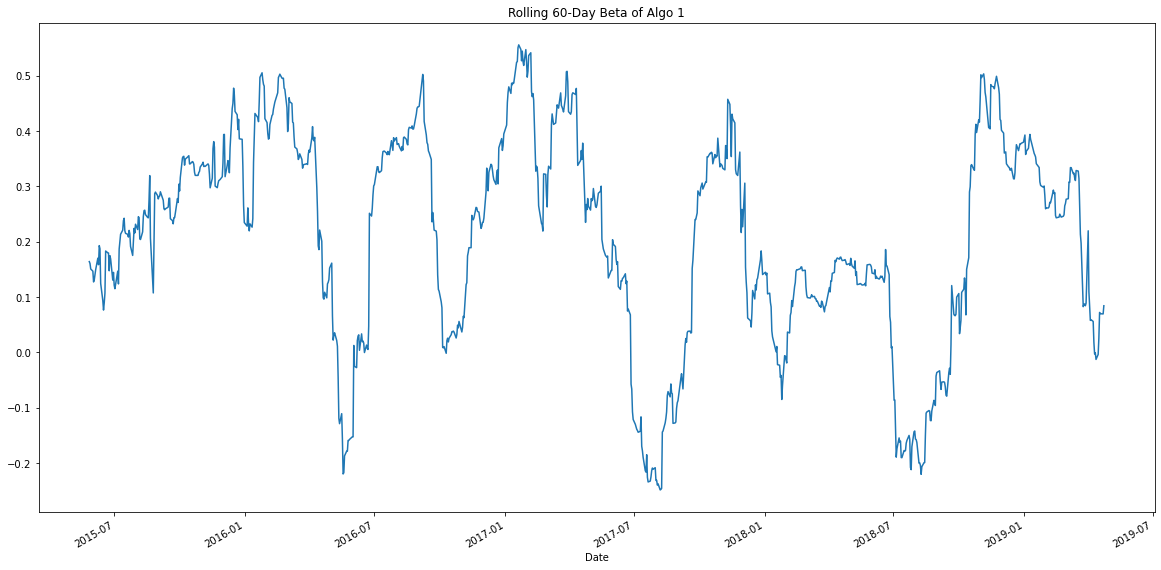

In [70]:
# Plot beta trend
rolling_covariance = portfolio_returns['Algo 1'].rolling(window=60).cov(portfolio_returns['SP500'])
rolling_variance = portfolio_returns['SP500'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Algo 1')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Plotting of the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life of the portfolio returns.

<AxesSubplot:title={'center':'Rolling statistics exponetially weighted average'}, xlabel='Date'>

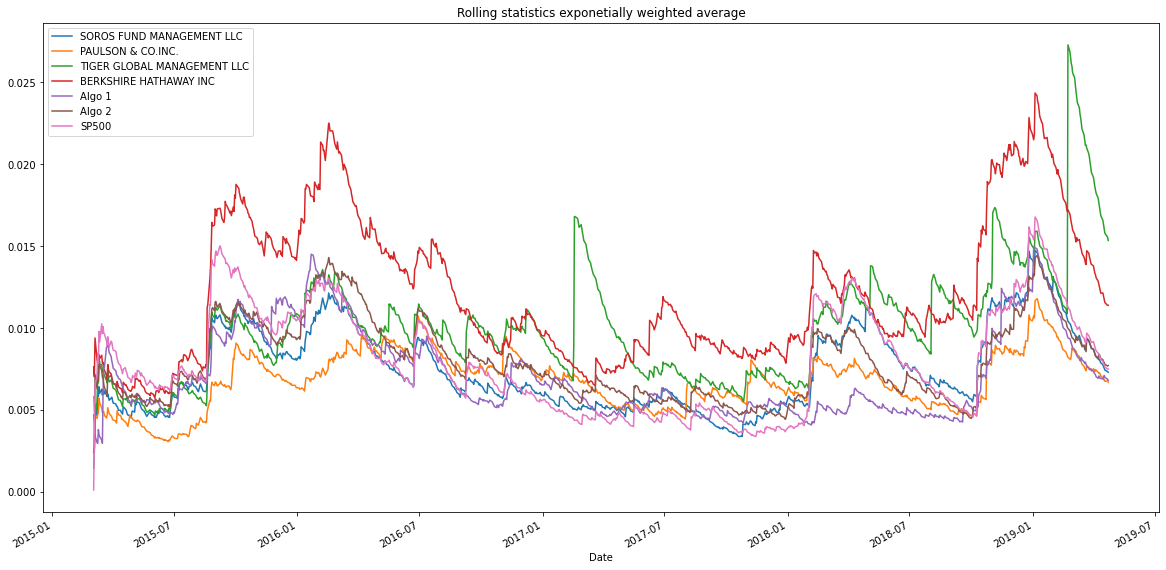

In [168]:
# Use `ewm` to calculate the rolling window
portfolio_returns.ewm(halflife=21).std().plot(figsize=(20,10), title="Rolling statistics exponetially weighted average")

---

# Sharpe Ratios

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [169]:
# Annualized Sharpe Ratios
sharpe_ratios = ((portfolio_returns.mean() - (0.000001 * 252)) / (portfolio_returns.std() * np.sqrt(252)))
sharpe_ratios.sort_values(ascending=False)

Algo 1                         0.003388
BERKSHIRE HATHAWAY INC         0.001239
SP500                          0.000717
Algo 2                         0.000087
SOROS FUND MANAGEMENT LLC     -0.000596
TIGER GLOBAL MANAGEMENT LLC   -0.001938
PAULSON & CO.INC.             -0.004179
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

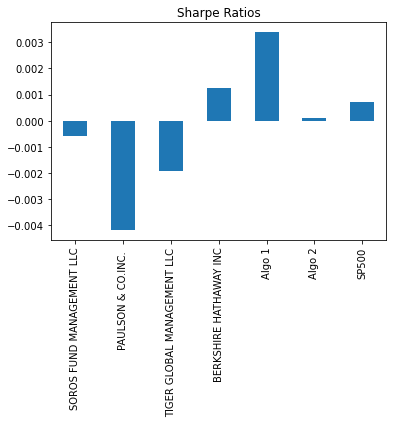

In [79]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.


According to the analysis of returns vs risk of all portfolios, the best portfolio to invest is the Algo 1. 
Algo 1 outperfoms all the portfolios.
Algo 2 underperforms the Algo 1, Berkshire Hathaway and the S&P 500 portfolios, but outperfoms the oher porfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [117]:
# Reading data from 1st stock
amzn_returns = Path("../Portfolio_analysis/amzn.csv")
amzn_df = pd.read_csv(amzn_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
amzn_df.sort_index(inplace=True)

In [118]:
# Reading data from 2nd stock
nvda_returns = Path("../Portfolio_analysis/nvda.csv")
nvda_df = pd.read_csv(nvda_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
nvda_df.sort_index(inplace=True)

In [119]:
# Reading data from 3rd stock
tsla_returns = Path("../Portfolio_analysis/tsla.csv")
tsla_df = pd.read_csv(tsla_returns, index_col="Date", parse_dates=True, infer_datetime_format=True)
tsla_df.sort_index(inplace=True)

In [120]:
# Combine all stocks in a single DataFrame
my_portfolio_returns = pd.concat([amzn_df, nvda_df, tsla_df], axis='columns', join='inner')

In [121]:
# Reset Date index
my_portfolio_returns.sort_index(inplace=True)

# my_portfolio_returns = my_portfolio_returns.reset_index()

In [122]:
# Reorganize portfolio data by having a column per symbol

#m y_portfolio_returns = my_portfolio_returns.pivot_table(values="close", index="Date", columns="Symbol")
# my_portfolio_returns.head()

my_portfolio_returns.columns = ["AMZN", "NVDA", "TSLA"]
my_portfolio_returns.head()

,AMZN,NVDA,TSLA
Date,,,
2012-10-01,252.01,3.28,5.83
2012-10-02,250.60,3.29,5.96
2012-10-03,255.92,3.26,5.86
2012-10-04,260.47,3.41,5.88
2012-10-05,258.51,3.33,5.78


In [123]:
# Calculate daily returns

my_portfolio_returns = my_portfolio_returns.pct_change()

# Drop NAs

my_portfolio_returns = my_portfolio_returns.dropna().copy()

# Display sample data

my_portfolio_returns.head()


,AMZN,NVDA,TSLA
Date,,,
2012-10-02,-0.005595,0.003049,0.022298
2012-10-03,0.021229,-0.009119,-0.016779
2012-10-04,0.017779,0.046012,0.003413
2012-10-05,-0.007525,-0.023460,-0.017007
2012-10-08,0.002128,-0.012012,0.012111


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [124]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns = my_portfolio_returns.dot(weights)

# Display sample data
my_portfolio_returns.head()

Date
2012-10-02    0.006584
2012-10-03   -0.001556
2012-10-04    0.022401
2012-10-05   -0.015997
2012-10-08    0.000742
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [125]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([portfolio_returns, my_portfolio_returns], axis='columns', join='inner')
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,0
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.003091
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.006810
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.008023
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.022528
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.005908


In [127]:
# Rename custom portfolio column
all_portfolio_returns.columns

Index([  'SOROS FUND MANAGEMENT LLC',          'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC',      'BERKSHIRE HATHAWAY INC',
                            'Algo 1',                      'Algo 2',
                             'SP500',                             0],
      dtype='object')

In [128]:
columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',                      'Algo 2',
           'SP500', 'My Portfolio']
all_portfolio_returns.columns = columns
all_portfolio_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,-0.003091
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,0.006810
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,0.008023
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,-0.022528
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.005908


In [129]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns = all_portfolio_returns.dropna().copy()

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative returns of all portfolios'}, xlabel='Date'>

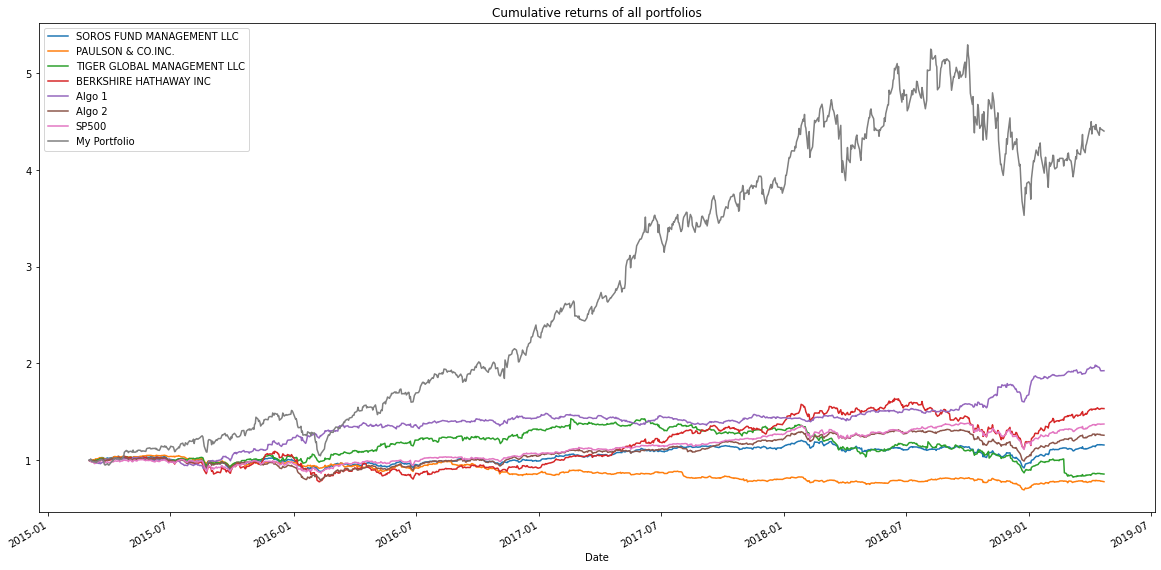

In [147]:
# Calculate cumulative returns of all portfolios
all_cumulative_returns = (1 + all_portfolio_returns).cumprod()
# Plot cumulative returns
all_cumulative_returns.plot(figsize=(20,10), title=("Cumulative returns of all portfolios"))

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [131]:
# Calculate the annualized `std`
all_annualized_std = all_portfolio_returns.std().sort_values(ascending=False) * np.sqrt(252)
all_annualized_std

My Portfolio                   0.292836
BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
SP500                          0.135787
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [132]:
# Calculate rolling standard deviation
all_portfolio_returns.rolling(window=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
Date,,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2019-04-15,0.006804,0.006225,0.007525,0.009729,0.005496,0.007572,0.006517,0.015493
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498,0.015826
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537,0.015675


<AxesSubplot:title={'center':'Standard deviation of all portfolios'}, xlabel='Date'>

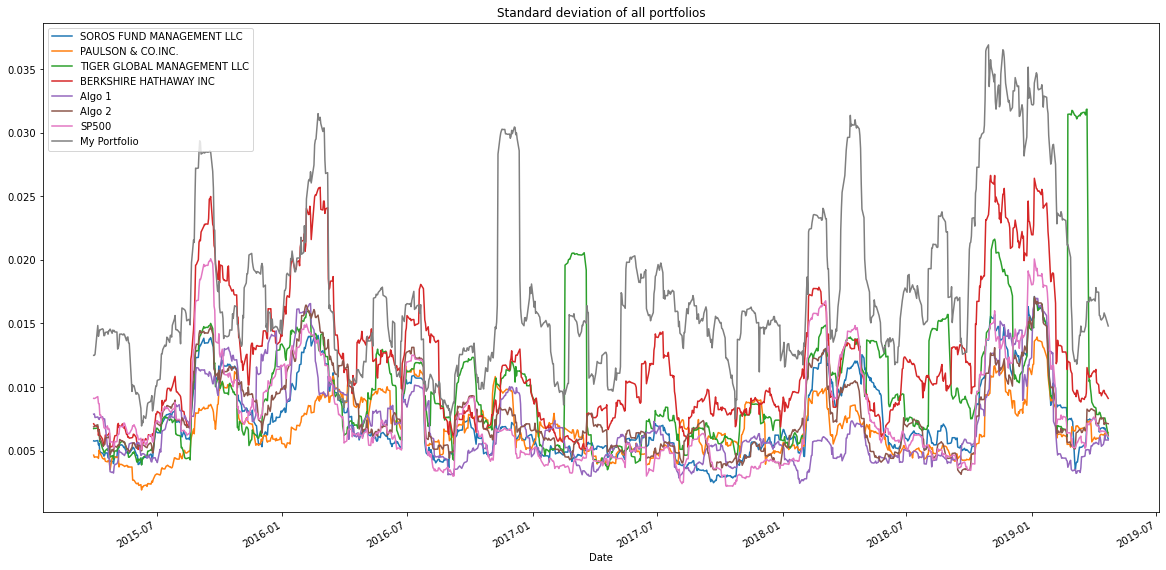

In [148]:
# Plot rolling standard deviation
all_portfolio_returns.rolling(window=21).std().plot(figsize=(20,10), title=("Standard deviation of all portfolios"))

### Calculate and plot the correlation

In [134]:
# Calculate correlation
all_correlation = all_portfolio_returns.corr()
all_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.837731,0.601708
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.669636,0.430907
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,0.623776,0.385546
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,0.751137,0.659542
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,0.279130,0.208832
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,0.858620,0.580366
SP500,0.837731,0.669636,0.623776,0.751137,0.279130,0.858620,1.000000,0.652346
My Portfolio,0.601708,0.430907,0.385546,0.659542,0.208832,0.580366,0.652346,1.000000


<AxesSubplot:>

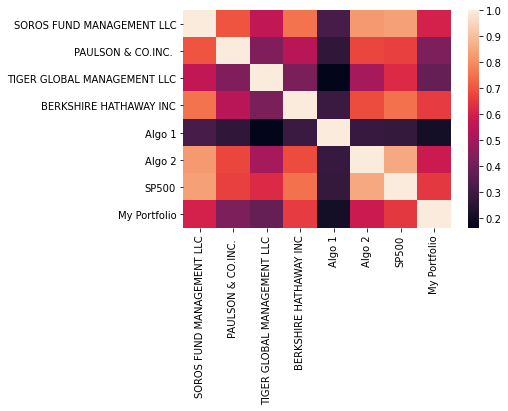

In [135]:
#plot correlation
sns.heatmap(all_correlation)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta

In [136]:
# Calculate covariance of my portfolio
my_portfolio_covariance = my_portfolio_returns.cov(portfolio_returns['SP500'])
my_portfolio_covariance

0.00010293431488502004

In [137]:
# Calculate variance of S&P 500
variance = portfolio_returns['SP500'].var()
variance

7.316632424648712e-05

In [139]:
# Computing beta
my_portfolio_beta = my_portfolio_covariance / variance
my_portfolio_beta

1.4068537123478926

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}, xlabel='Date'>

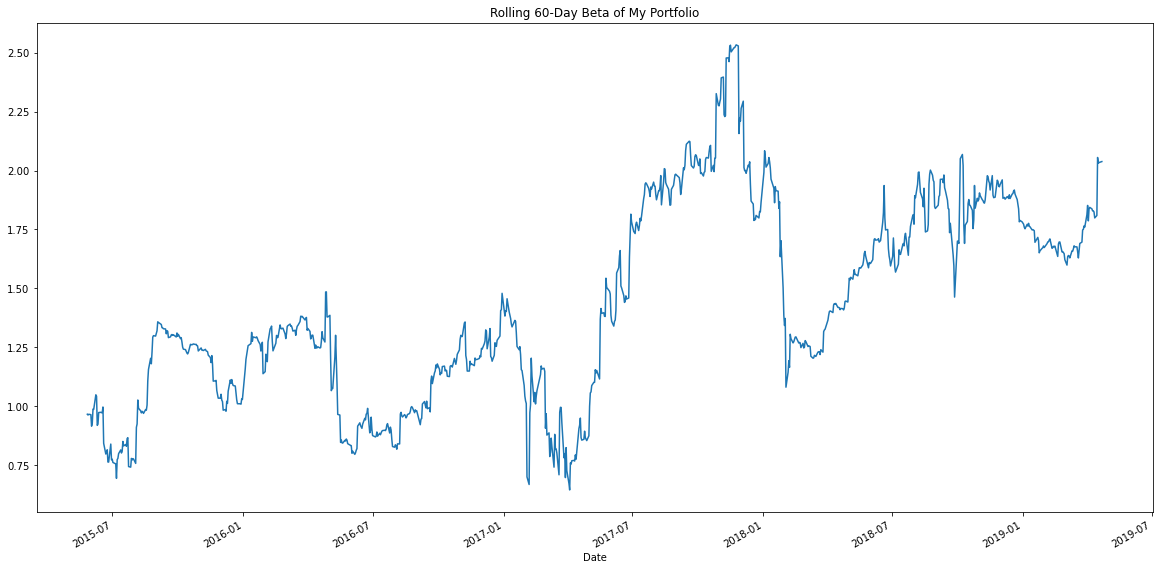

In [140]:
# Plot beta trend
my_rolling_covariance = my_portfolio_returns.rolling(window=60).cov(portfolio_returns['SP500'])
rolling_variance = portfolio_returns['SP500'].rolling(window=60).var()

my_rolling_beta = my_rolling_covariance / rolling_variance
my_rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [149]:
# Calculate Annualized Sharpe Ratios
all_sharpe_ratios = ((all_portfolio_returns.mean() - (0.000001 * 252)) / (all_portfolio_returns.std() * np.sqrt(252)))
all_sharpe_ratios.sort_values(ascending=False)

My Portfolio                   0.004582
Algo 1                         0.003352
BERKSHIRE HATHAWAY INC         0.001179
SP500                          0.000657
Algo 2                         0.000019
SOROS FUND MANAGEMENT LLC     -0.000650
TIGER GLOBAL MANAGEMENT LLC   -0.001973
PAULSON & CO.INC.             -0.004210
dtype: float64

<AxesSubplot:title={'center':'All Sharpe Ratios'}>

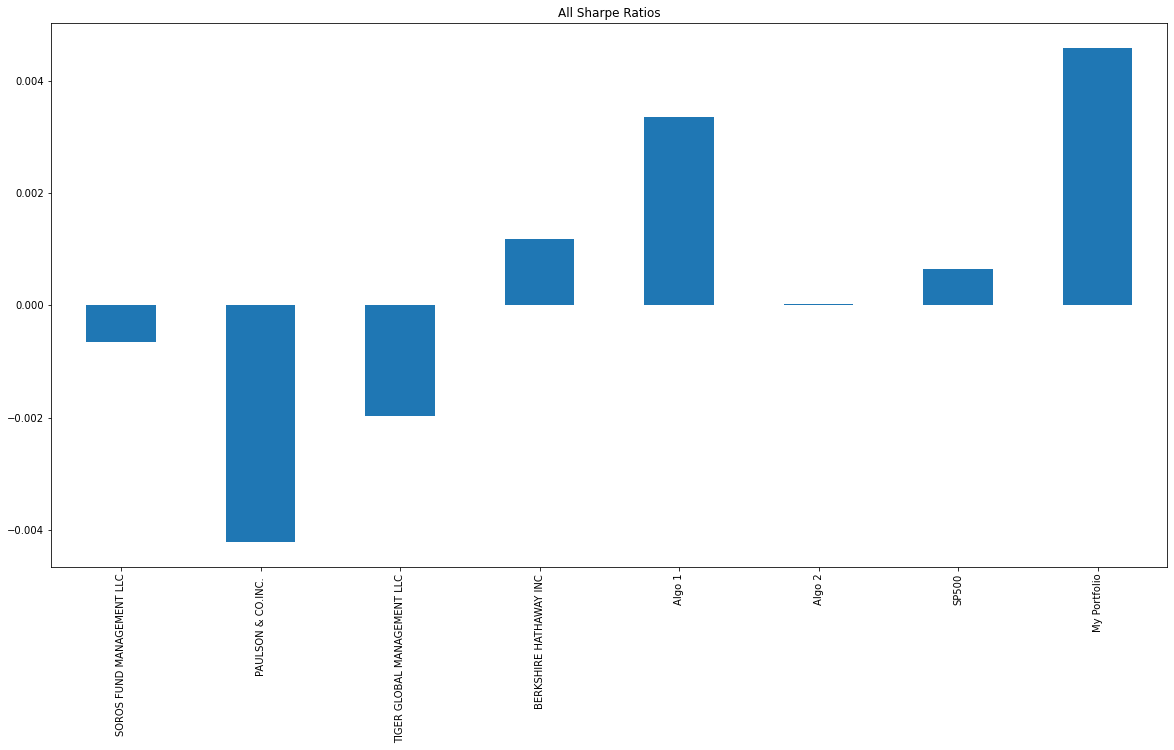

In [144]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind="bar", figsize=(20,10), title="All Sharpe Ratios")

### How does your portfolio do?

My portfolio outperfoms all the other portfolios.